In [39]:
# Importing all the necessary libraries and modules
from keras.layers import Dense,Flatten,Input
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.applications.vgg16 import VGG16,preprocess_input
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# Defining the size of input images for the modeling
imageSize = [224, 224]

In [41]:
# 1-Loading the VGG16 model with pre-trained weights on ImageNet dataset and excluding the top layer
vgg=VGG16(input_shape=imageSize + [3],weights='imagenet',include_top=False)

In [42]:
# 2-Freezing all layers in the VGG16 model to prevent retraining of pre-trained weights
for layer in vgg.layers:
    layer.trainable=False

In [43]:
# 3-Flattening the output of VGG16 and add a Dense layer with softmax activation for 8 classes
x=Flatten()(vgg.output)

In [44]:
prediction=Dense(8,activation='softmax')(x)

In [45]:
# Creating a new model by specifying input and output layers
model=Model(inputs=vgg.input,outputs=prediction)

In [46]:
# Displaying summary of the model architecture
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [47]:
# 4-Compiling the model with categorical cross-entropy loss, Adam optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'],run_eagerly=True)

In [48]:
# 5-Data augmentation and preprocessing for the training dataset
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
# Data preprocessing for the testing dataset
test_datagen=ImageDataGenerator(rescale=1./255)

In [49]:
# train_path="C:\Users\Tushar\Desktop\DL Project\Data Set\training"
# test_path="C:\Users\Tushar\Desktop\DL Project\Data Set\testing"

In [50]:
# 6-Loading and preprocessing the  images from the training directory
training_set=train_datagen.flow_from_directory(r"C:\Users\Tushar\Desktop\DL Project\Data Set\training",target_size=(224,224),batch_size=32,class_mode='categorical')
# Load and preprocess images from the testing directory
test_set=test_datagen.flow_from_directory(r"C:\Users\Tushar\Desktop\DL Project\Data Set\testing",target_size=(224,224),batch_size=32,class_mode='categorical')

Found 619 images belonging to 8 classes.
Found 266 images belonging to 8 classes.


In [51]:
# Displaying the mapping of class indices to their respective classes
training_set.class_indices

{'Anthracnose': 0,
 'algal leaf': 1,
 'bird eye spot': 2,
 'brown blight': 3,
 'gray light': 4,
 'healthy': 5,
 'red leaf spot': 6,
 'white spot': 7}

In [52]:
import tensorflow as tf 
print(len(tf.config.list_physical_devices('GPU')))

0


In [53]:
# 7-Training the model using the training dataset and validating on the testing dataset for 30 epochs
r=model.fit(training_set,validation_data=test_set,epochs=30)

Epoch 1/30
20/20 [==============================] - 280s 14s/step - loss: 2.3965 - accuracy: 0.2649 - val_loss: 1.7144 - val_accuracy: 0.4286
Epoch 2/30
20/20 [==============================] - 289s 14s/step - loss: 1.1195 - accuracy: 0.6123 - val_loss: 1.0040 - val_accuracy: 0.6353
Epoch 3/30
20/20 [==============================] - 264s 13s/step - loss: 0.7379 - accuracy: 0.7464 - val_loss: 0.8184 - val_accuracy: 0.6992
Epoch 4/30
20/20 [==============================] - 266s 13s/step - loss: 0.6020 - accuracy: 0.7916 - val_loss: 0.7828 - val_accuracy: 0.6842
Epoch 5/30
20/20 [==============================] - 269s 13s/step - loss: 0.4882 - accuracy: 0.8384 - val_loss: 1.1662 - val_accuracy: 0.5602
Epoch 6/30
20/20 [==============================] - 268s 13s/step - loss: 0.5040 - accuracy: 0.8304 - val_loss: 0.8353 - val_accuracy: 0.6917
Epoch 7/30
20/20 [==============================] - 269s 13s/step - loss: 0.3953 - accuracy: 0.8740 - val_loss: 0.8281 - val_accuracy: 0.6692
Epoch 

In [55]:
# Saving the model
model.save('Tea-LeavesDisease-Detection-Model.h5')

c:\Users\Tushar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  


In [66]:
# Importing the necessary libraries for image processing and prediction
from keras.models import load_model
from keras.applications.inception_v3 import preprocess_input
import numpy as np

In [89]:
# 8-Below is an example of predicting an image after loading, preprocessing, and predicting the class index
img=image.load_img(r'C:\Users\Tushar\Desktop\DL Project\Data Set\training\healthy\UNADJUSTEDNONRAW_thumb_215.jpg',target_size=(224,224))
x=image.img_to_array(img) # Convert image to numpy array

In [90]:
x=np.expand_dims(x,axis=0) # Expands dimensions to match the model input shape
img_data=preprocess_input(x) # Preprocesses the  input data
output=np.argmax(model.predict(img_data),axis=1) # Performs prediction
index=['Anthracnose','algal leaf', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot', 'white spot']
result=str(index[output[0]]) # Gets the predicted class label
result  # Displays the predicted class label

1/1 [==============================] - 0s 177ms/step


'healthy'

In [91]:
index[output[0]]

'healthy'

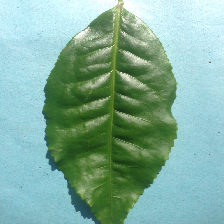

In [92]:
img